<a href="https://colab.research.google.com/github/dqduy2k4/house_price_prediction/blob/main/Project2_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nguyentiennhan/vietnam-housing-dataset-2024")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'vietnam-housing-dataset-2024' dataset.
Path to dataset files: /kaggle/input/vietnam-housing-dataset-2024


In [ ]:
import os
os.listdir(path)

['vietnam_housing_dataset.csv']

# Import thư viện

In [ ]:
#Vẽ biểu đồ
import seaborn as sns
import matplotlib.pyplot as plt
#Thao tác với dữ liệu
import pandas as pd
import numpy as np

#Train-test split, Hyperparameter tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
#Mã hóa, chuẩn hóa dữ liệu
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
#Model
from sklearn.impute import SimpleImputer
#Import model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
#Đánh giá mô hình
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#Lưu model đã tuning
import joblib

#EDA and Feature engineering

In [ ]:
house_data = pd.read_csv(f"{path}/vietnam_housing_dataset.csv", encoding='utf-8')
house_data.head()


,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90


## Tổng quan về dữ liệu

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  float64
 2   Frontage           18665 non-null  float64
 3   Access Road        16932 non-null  float64
 4   House direction    8990 non-null   object 
 5   Balcony direction  5246 non-null   object 
 6   Floors             26626 non-null  float64
 7   Bedrooms           25067 non-null  float64
 8   Bathrooms          23155 non-null  float64
 9   Legal status       25723 non-null  object 
 10  Furniture state    16110 non-null  object 
 11  Price              30229 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB


In [ ]:
house_data.describe()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Price
count,30229.000000,18665.000000,16932.000000,26626.000000,25067.000000,23155.000000,30229.000000
mean,68.498741,5.361692,7.853800,3.410426,3.511030,3.346837,5.872078
std,48.069835,4.346174,7.451313,1.328897,1.309116,1.400181,2.211877
min,3.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,40.000000,4.000000,4.000000,2.000000,3.000000,2.000000,4.200000
50%,56.000000,4.500000,6.000000,3.000000,3.000000,3.000000,5.900000
75%,80.000000,5.000000,10.000000,4.000000,4.000000,4.000000,7.500000
max,595.000000,77.000000,85.000000,10.000000,9.000000,9.000000,11.500000


Loại bỏ những cột có quá nhiều giá trị null (>50%)

In [ ]:
missing_values = house_data.isnull().sum()
print("Số lượng giá trị thiếu trong mỗi cột:")
print(missing_values[missing_values > 0])

Số lượng giá trị thiếu trong mỗi cột:
Frontage             11564
Access Road          13297
House direction      21239
Balcony direction    24983
Floors                3603
Bedrooms              5162
Bathrooms             7074
Legal status          4506
Furniture state      14119
dtype: int64


In [ ]:
house_data.drop(['House direction', 'Balcony direction'], axis=1, inplace=True)
house_data.head()

,Address,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,2.0,4.0,4.0,Have certificate,Full,6.90


## Data visualization

<Axes: xlabel='Price', ylabel='Count'>

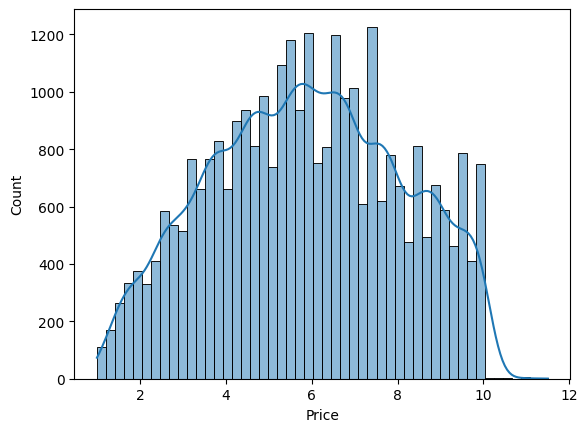

In [ ]:
#Trực quan hóa sự phân phối của cột dữ liệu Price (Giá nhà)
sns.histplot(house_data['Price'], kde=True)

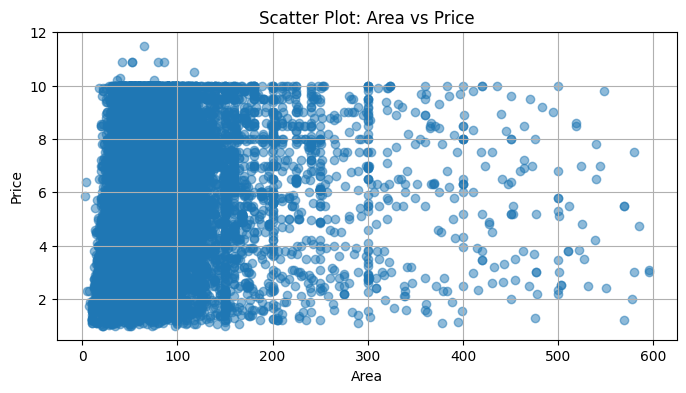

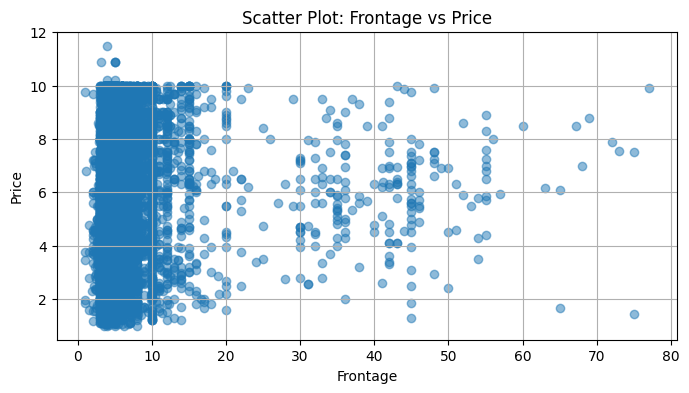

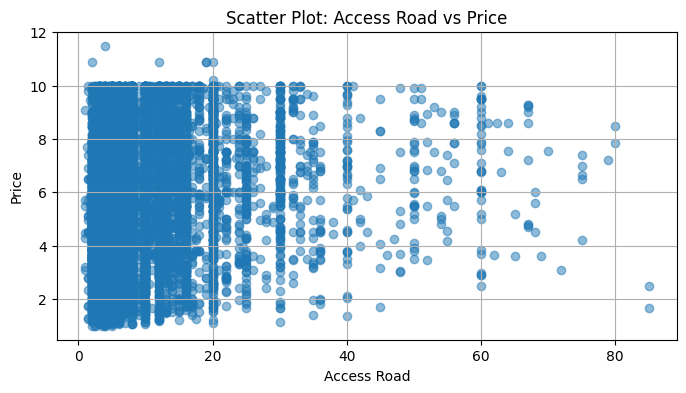

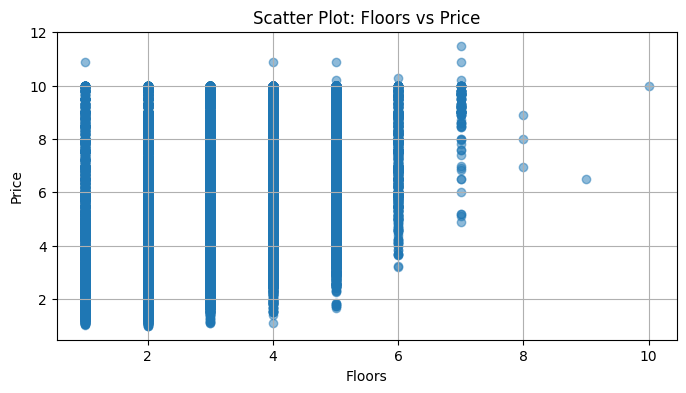

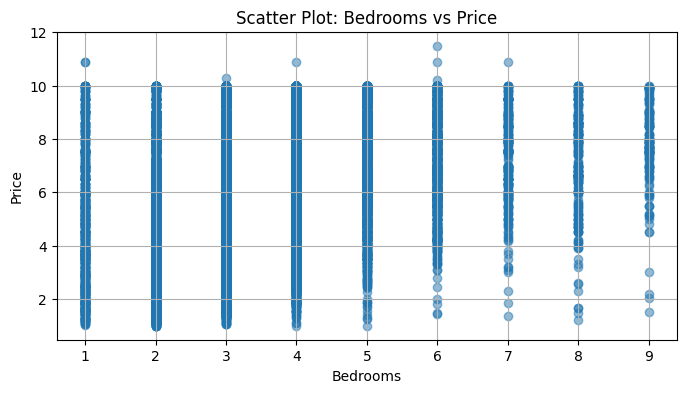

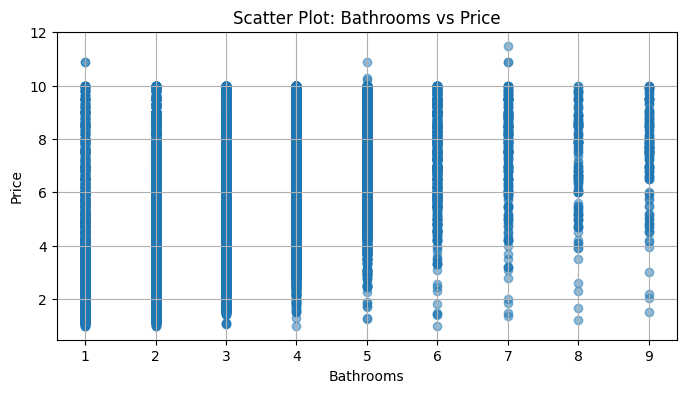

In [ ]:
# Danh sách các đặc điểm số để vẽ đồ thị so với 'Giá'
numerical_features = house_data.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('Price', errors='ignore')

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.scatter(house_data[feature], house_data['Price'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

## Xử lý missing values

In [ ]:
# Xóa bỏ những dòng có quá nhiều giá trị thiếu

# Lưu lại số lượng dòng trước khi xử lý
initial_rows = len(house_data)

# Xác định tỷ lệ thiếu cho phép (<=50%)
threshold_percent = 0.5
limit = len(house_data.columns) * threshold_percent

# Lọc dữ liệu
house_data_clean = house_data[house_data.isnull().sum(axis=1) <= limit]

# Tính số dòng đã bị xóa
rows_removed = initial_rows - len(house_data_clean)
print(f"Số lượng dòng bị xóa: {rows_removed}")

Số lượng dòng bị xóa: 1605


In [ ]:
# Điền các giá trị NaN bằng median với biến số và nhãn "Unknown" với biến phân loại
num_cols = ['Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms']
for col in num_cols:
    house_data[col] = house_data[col].fillna(house_data[col].median())
cat_cols = ['Legal status', 'Furniture state']
for col in cat_cols:
    house_data[col] = house_data[col].fillna('Unknown')

## Xử lý outlier values

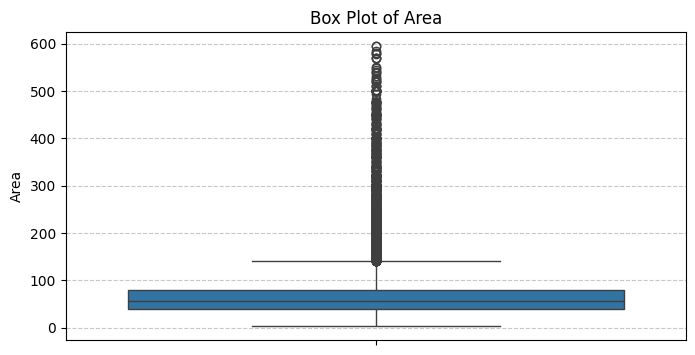

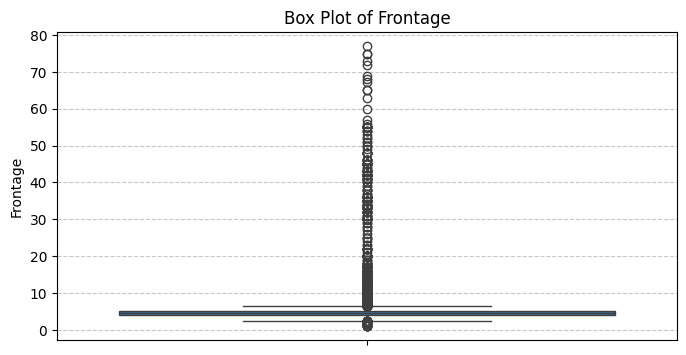

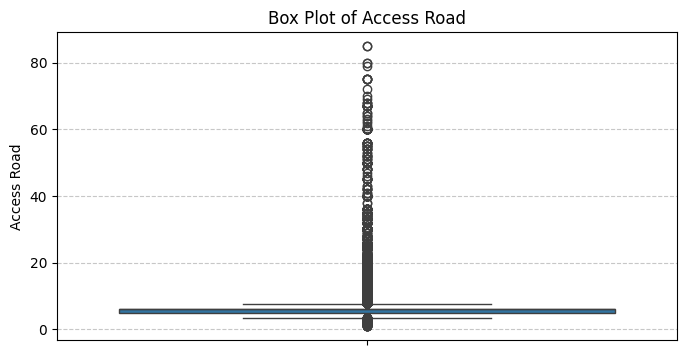

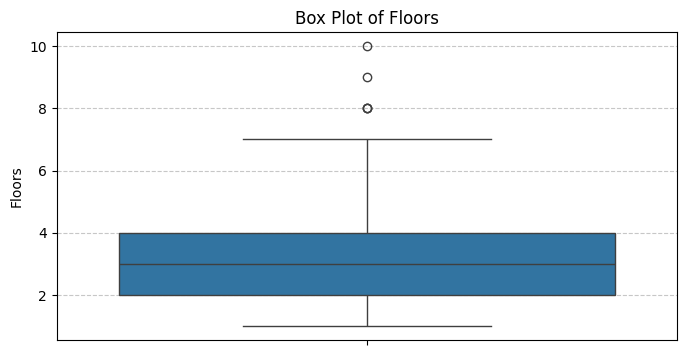

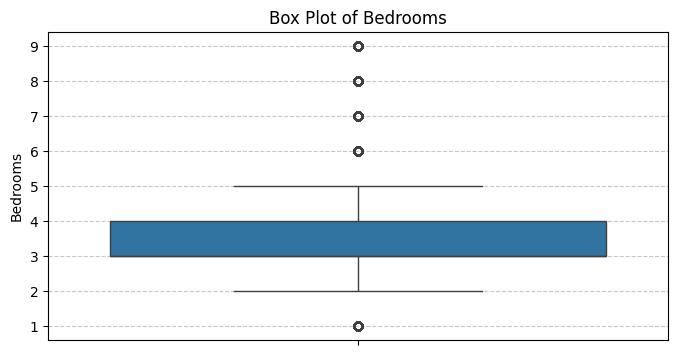

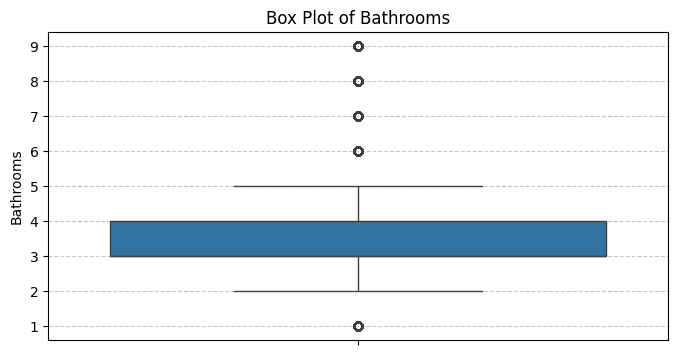

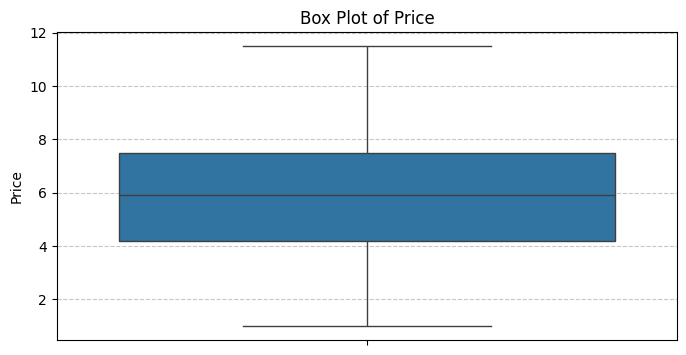

In [ ]:
# Biểu đồ Boxplot để xem phân phối của các biến số
numerical_cols = house_data.select_dtypes(include=['number']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=house_data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
# Danh sách các cột feature cần xử lý
cols_to_fix = ['Area', 'Frontage', 'Access Road']

# FEATURE CAPPING (WINSORIZATION)
# Thay vì xóa hàng, ta giới hạn giá trị ở phân vị 1% và 99%
# Điều này giúp loại bỏ sự "cực đoan" của mặt tiền hoặc đường vào quá rộng
for col in cols_to_fix:
    # Giới hạn ở mức 1% và 99%
    lower_limit = house_data[col].quantile(0.01)
    upper_limit = house_data[col].quantile(0.99)

    house_data[col] = house_data[col].clip(lower_limit, upper_limit)

# XỬ LÝ LỖI LOGIC (Ví dụ: diện tích quá nhỏ không tưởng)
house_data = house_data[house_data['Area'] >= 20].copy()

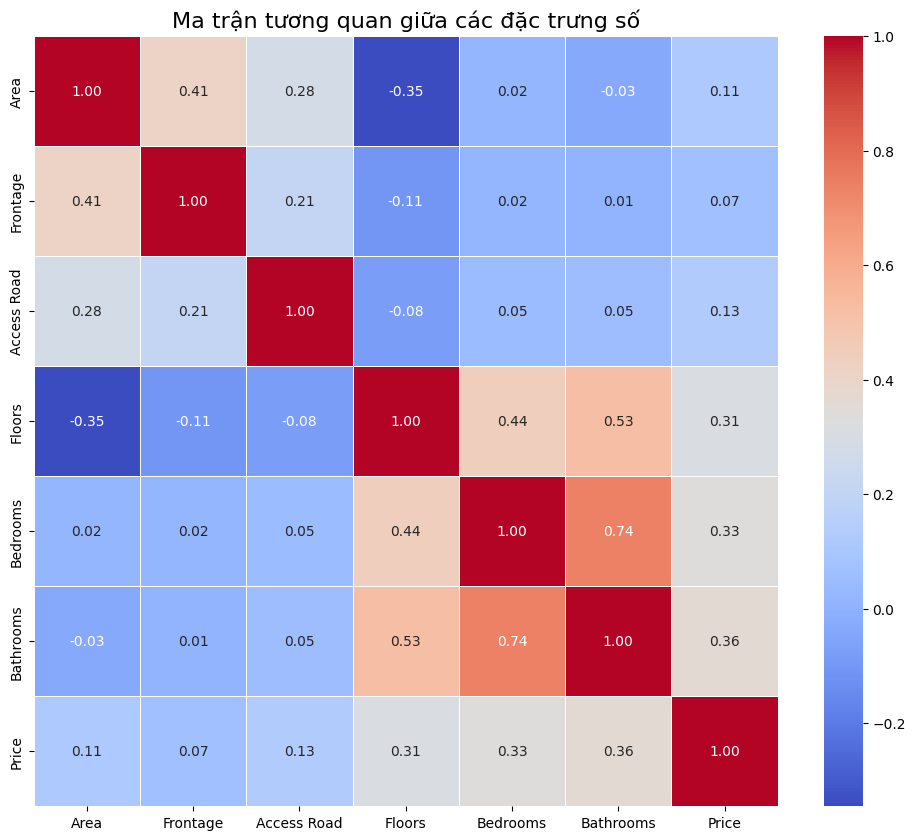


Correlation with 'Price' variable:
Price          1.000000
Bathrooms      0.363963
Bedrooms       0.332543
Floors         0.309113
Access Road    0.130658
Area           0.114266
Frontage       0.067922
Name: Price, dtype: float64


In [ ]:
# Tương quan giữa các biến số với giá nhà
correlation_matrix = house_data.select_dtypes(include=['number']).corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Ma trận tương quan giữa các đặc trưng số', fontsize=16)
plt.show()

# Phần tích tương quan với 'Price'
print("\nCorrelation with 'Price' variable:")
print(correlation_matrix['Price'].sort_values(ascending=False))

## Xử lý dữ liệu cột Address

In [ ]:
house_data['Province'] = house_data['Address'].str.split(", ").str[-1].str.replace(".", "")
# Tách Address thành list
parts = house_data['Address'].str.split(',').apply(
    lambda x: [p.strip() for p in x]
)

# Province: luôn là phần tử cuối
house_data['Province'] = parts.str.get(-1).str.replace('.', '', regex=False)

# District: phần tử trước Province
house_data['District'] = parts.str.get(-2)

# Ward: phần tử trước District
house_data['Ward'] = parts.str.get(-3)

# Street: phần tử còn lại đầu tiên (chỉ khi có >= 4 phần)
house_data['Street'] = parts.apply(
    lambda x: x[0] if len(x) >= 4 else None
)

# IsProject: nếu bđs thuộc 1 dự án nào đó
house_data['IsProject'] = house_data['Street'].str.contains('dự án', case=False, na=False).astype(int)

house_data.drop('Address', axis=1, inplace=True)
house_data.head()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price,Province,District,Ward,Street,IsProject
0,84.0,4.5,6.0,4.0,3.0,3.0,Have certificate,Unknown,8.60,Hưng Yên,Văn Giang,Xã Long Hưng,Dự án The Empire - Vinhomes Ocean Park 2,1
1,60.0,4.5,6.0,5.0,3.0,3.0,Unknown,Unknown,7.50,Hưng Yên,Văn Giang,Xã Nghĩa Trụ,Dự án The Crown - Vinhomes Ocean Park 3,1
2,90.0,6.0,13.0,5.0,3.0,3.0,Sale contract,Unknown,8.90,Hưng Yên,Văn Giang,Xã Nghĩa Trụ,Dự án The Crown - Vinhomes Ocean Park 3,1
3,54.0,4.5,3.5,2.0,2.0,3.0,Have certificate,Full,5.35,Hồ Chí Minh,Gò Vấp,Phường 11,Đường Nguyễn Văn Khối,0
4,92.0,4.5,6.0,2.0,4.0,4.0,Have certificate,Full,6.90,Hồ Chí Minh,Gò Vấp,Phường 8,Đường Quang Trung,0


Khám giá mối quan hệ giữa giá nhà và tỉnh thành

In [ ]:
house_data['Province'].value_counts()

,count
Province,
Hồ Chí Minh,11778
Hà Nội,10457
Bình Dương,1672
Đà Nẵng,1437
Đồng Nai,829
...,...
Quận 8,1
Kon Tum,1
TP Hồ Chí Minh,1


In [ ]:
#Loại bỏ nhiễu dữ liệu
unique_provinces = house_data['Province'].value_counts()
unique_provinces = unique_provinces[unique_provinces < 5].index
house_data = house_data[~house_data['Province'].isin(unique_provinces)]

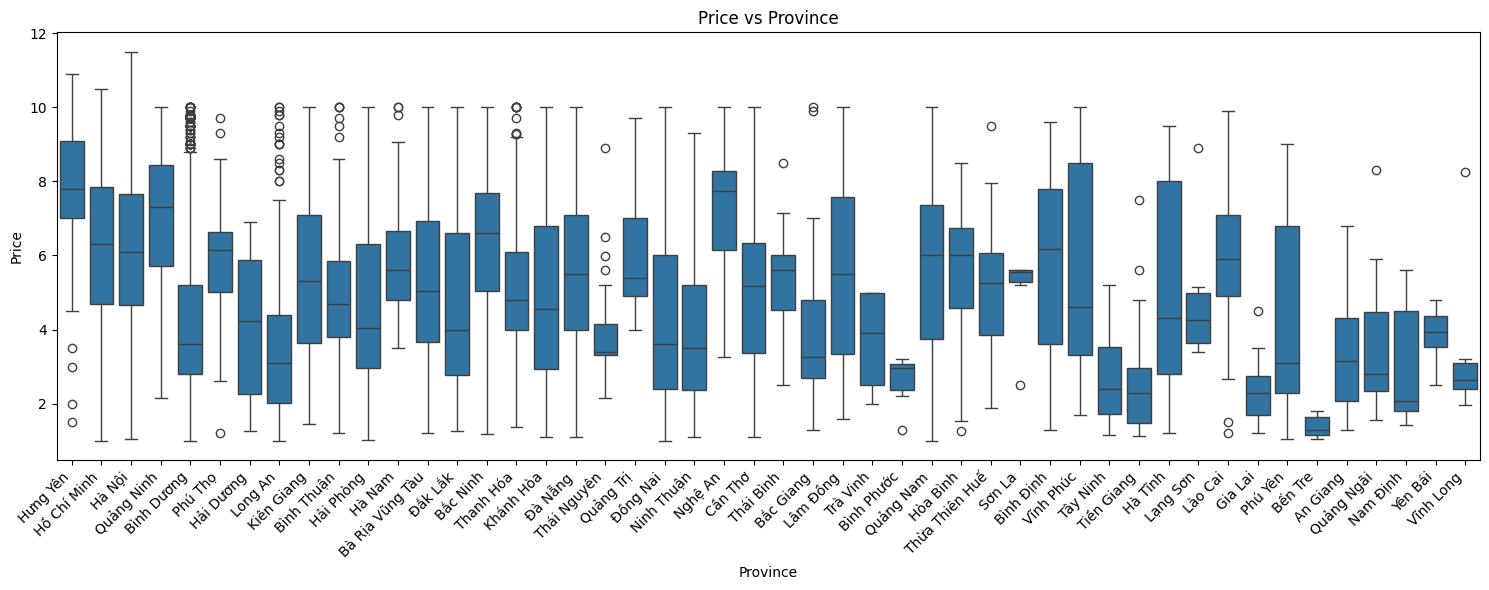

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Province', y='Price', data=house_data)
plt.title('Price vs Province')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# Model

## Chia dữ liệu thành 2 tập Train và Test (80 - 20)

In [ ]:
# Tách biến mục tiêu (Price) ra
y = house_data['Price']
X = house_data.drop(['Price'], axis=1)

# Chia tập Train - Test (80% Train, 20% Test)
# random_state giúp kết quả chia giống nhau ở mọi lần chạy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Encoding categorical features

In [ ]:
#Cài thư viện category_encoders để chuyển đổi các biến phân loại (categorical data) thành dạng số (numerical data)
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

def process_geo_features_optimized(X_train, X_test, y_train):
    # Copy để tránh warning SettingWithCopy
    X_train = X_train.copy()
    X_test = X_test.copy()

    # Tạo Hierarchy Features
    X_train['Dist_Ward'] = X_train['District'] + "_" + X_train['Ward']
    X_test['Dist_Ward'] = X_test['District'] + "_" + X_test['Ward']

    X_train['Dist_Street'] = X_train['District'] + "_" + X_train['Street']
    X_test['Dist_Street'] = X_test['District'] + "_" + X_test['Street']

    # Nhóm các cột cần xử lý
    onehot_cols = ['Legal status', 'Furniture state']
    target_cols = ['Dist_Ward', 'Dist_Street', 'District', 'Province']

    # One-Hot Encoding (Dùng Sklearn để tự động handle unknown)
    # handle_unknown='ignore': Nếu test có category lạ -> gán tất cả vector bằng 0
    ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

    # Fit trên train
    ohe.fit(X_train[onehot_cols])

    # Transform và gán lại tên cột
    # Lấy tên cột sau khi encode
    new_cols = ohe.get_feature_names_out(onehot_cols)

    # Tạo DataFrame mới từ OHE
    X_train_ohe = pd.DataFrame(ohe.transform(X_train[onehot_cols]), columns=new_cols, index=X_train.index)
    X_test_ohe = pd.DataFrame(ohe.transform(X_test[onehot_cols]), columns=new_cols, index=X_test.index)

    # Target Encoding (MEstimate)
    m_encoder = ce.MEstimateEncoder(cols=target_cols, m=5.0)
    m_encoder.fit(X_train[target_cols], y_train)

    X_train_target = m_encoder.transform(X_train[target_cols])
    X_test_target = m_encoder.transform(X_test[target_cols])

    # Bỏ các cột cũ đi
    # Lấy các cột không nằm trong danh sách đã xử lý
    cols_processed = onehot_cols + target_cols + ['Ward', 'Street'] # Ward/Street gốc bỏ đi
    rest_cols = [c for c in X_train.columns if c not in cols_processed]

    X_train_final = pd.concat([X_train[rest_cols], X_train_ohe, X_train_target], axis=1)
    X_test_final = pd.concat([X_test[rest_cols], X_test_ohe, X_test_target], axis=1)

    return X_train_final, X_test_final

# Gọi hàm
X_train, X_test = process_geo_features_optimized(X_train, X_test, y_train)


In [ ]:
# Kiểm tra xem còn cột nào là object không
print(X_train.select_dtypes(include=['object']).columns)

# Kiểm tra xem còn giá trị NaN không
print(X_train.isnull().sum().sum())

Index([], dtype='object')
0


In [ ]:
X_train.head()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,IsProject,Legal status_Sale contract,Legal status_Unknown,Furniture state_Full,Furniture state_Unknown,Dist_Ward,Dist_Street,District,Province
22749,81.3,5.0,6.0,5.0,3.0,3.0,1,0.0,0.0,0.0,1.0,8.907458,8.907458,7.172385,6.149857
11538,66.0,4.5,5.0,3.0,4.0,4.0,0,0.0,0.0,1.0,0.0,6.058316,5.161473,6.623337,6.202026
1516,58.0,3.7,6.0,2.0,2.0,2.0,0,0.0,0.0,0.0,0.0,5.905826,5.156572,5.513130,6.202026
22103,121.0,5.0,6.0,2.0,3.0,3.0,0,0.0,0.0,0.0,0.0,5.797324,6.664915,6.367214,5.686943
29263,72.0,4.5,18.0,4.0,5.0,4.0,0,0.0,0.0,0.0,1.0,4.743302,5.449915,4.384957,4.324597


## Ridge Regression + tuning

In [ ]:
# Chuẩn hóa dữ liệu với mô hình này
# Phân loại cột
cols_outliers = ['Area', 'Frontage', 'Access Road'] # Nhiều outliers
cols_normal = ['Bathrooms', 'Bedrooms', 'Floors']   # Ít outliers

# Xử lý nhóm nhiều Outliers: Log trước -> sau đó Scale
log_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scaler', StandardScaler())
])

# Tổng hợp lại bằng ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('heavy_outliers', log_pipeline, cols_outliers),
        ('light_outliers', StandardScaler(), cols_normal)
    ],
    remainder='passthrough' # Giữ lại các cột khác
)

# Đưa vào mô hình Ridge
model_rr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Tìm tham số Alpha tốt nhất
param_grid = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 200.0]
}

# Sử dụng Cross-Validation (K-Fold) để tìm alpha
grid_search = GridSearchCV(model_rr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_model_rr = grid_search.best_estimator_
print(f"Alpha tốt nhất tìm được: {grid_search.best_params_['regressor__alpha']}")

# Dự đoán và Đánh giá trên tập Test
y_pred_rr = best_model_rr.predict(X_test)

# Đánh giá
mse_rr = mean_squared_error(y_test, y_pred_rr)
rmse_rr = np.sqrt(mse_rr)
mae_rr = mean_absolute_error(y_test, y_pred_rr)
r2_rr = r2_score(y_test, y_pred_rr)

print("--- Kết quả Đánh giá ---")
print(f"RMSE (Sai số căn quân phương): {rmse_rr:,.2f}")
print(f"MAE (Sai số tuyệt đối trung bình): {mae_rr:,.2f}")
print(f"R2 Score (Độ phù hợp): {r2_rr:.4f}")

Alpha tốt nhất tìm được: 10.0
--- Kết quả Đánh giá ---
RMSE (Sai số căn quân phương): 1.51
MAE (Sai số tuyệt đối trung bình): 1.17
R2 Score (Độ phù hợp): 0.5376


## RandomForest

In [ ]:
# Khởi tạo mô hình
# n_estimators=100: Số lượng cây
# n_jobs=-1: Sử dụng tất cả các lõi CPU để chạy nhanh hơn
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_rf = rf_model.predict(X_test)

# Tính toán các chỉ số
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"RMSE: {rmse:,.2f}") # Sai số trung bình (quan trọng nhất)
print(f"MAE: {mae:,.2f}")   # Sai số tuyệt đối trung bình
print(f"R2 Score: {r2:.4f}") # Độ phù hợp của mô hình

RMSE: 1.38
MAE: 0.98
R2 Score: 0.6128


### Hyperparameter tuning

In [ ]:
# Tinh chỉnh lại không gian tham số
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Khởi tạo RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error', # Sử dụng RMSE để tối ưu
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

# Kết quả
print(f"RMSE tốt nhất trên tập train (CV): {-rf_random.best_score_:.4f}")
print("Tham số tốt nhất:", rf_random.best_params_)

# Dự đoán
best_model_rf = rf_random.best_estimator_
y_pred_best_rf = best_model_rf.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RMSE tốt nhất trên tập train (CV): 1.1019
Tham số tốt nhất: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [ ]:
# Lưu lại
joblib.dump(
    best_model_rf,
    "/content/drive/MyDrive/models/best_model_rf.pkl"
)

['/content/drive/MyDrive/models/best_model_rf.pkl']

In [ ]:
# load để chạy demo
path_rf = '/content/drive/MyDrive/models/best_model_rf.pkl'
loaded_model_rf = joblib.load(path_rf)

In [ ]:
# Đánh giá
y_pred_best_rf = loaded_model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_rf = r2_score(y_test, y_pred_best_rf)

print("--- Kết quả Đánh giá sau khi tuning---")
print(f"RMSE: {rmse_rf:,.2f}")
print(f"MAE: {mae_rf:,.2f}")
print(f"R2 Score: {r2_rf:.4f}")

--- Kết quả Đánh giá sau khi tuning---
RMSE: 1.34
MAE: 0.97
R2 Score: 0.6339


## Xgboost

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 1.3 MB/s eta 0:00:00


In [ ]:
# Thư viện nặng, import sau
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
# Khởi tạo mô hình với các tham số cơ bản
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror', # Hàm mục tiêu cho hồi quy
    n_estimators=1000,            # Số lượng cây
    learning_rate=0.05,           # Tốc độ học
    max_depth=6,                  # Độ sâu tối đa của cây (tránh overfitting)
    colsample_bytree=0.8,         # Tỷ lệ đặc trưng (feature) dùng cho mỗi cây
    subsample=0.8,                # Tỷ lệ mẫu dữ liệu dùng cho mỗi cây
    random_state=42,              # Để kết quả có thể tái lập
    n_jobs=-1,                    # Sử dụng tất cả các luồng CPU
    early_stopping_rounds=50      # Dừng nếu sau 50 vòng lặp lỗi trên tập test không giảm
)

# Huấn luyện mô hình
# eval_set giúp theo dõi lỗi trên tập test ngay trong quá trình train để dừng sớm (early stopping)
xg_reg.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=100               # In kết quả sau mỗi 100 vòng lặp
)

# Dự đoán trên tập test
y_pred_xg = xg_reg.predict(X_test)

# Tính toán các chỉ số
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xg))
mae = mean_absolute_error(y_test, y_pred_xg)
r2 = r2_score(y_test, y_pred_xg)

print(f"RMSE (Root Mean Squared Error): {rmse:,.2f}")
print(f"MAE (Mean Absolute Error): {mae:,.2f}")
print(f"R2 Score: {r2:.4f}")

[0]	validation_0-rmse:2.14496	validation_1-rmse:2.17482
[100]	validation_0-rmse:1.07495	validation_1-rmse:1.40001
[200]	validation_0-rmse:0.99713	validation_1-rmse:1.35816
[300]	validation_0-rmse:0.94435	validation_1-rmse:1.33271
[400]	validation_0-rmse:0.90270	validation_1-rmse:1.31766
[500]	validation_0-rmse:0.86546	validation_1-rmse:1.30802
[600]	validation_0-rmse:0.83305	validation_1-rmse:1.30034
[700]	validation_0-rmse:0.80444	validation_1-rmse:1.29392
[800]	validation_0-rmse:0.77794	validation_1-rmse:1.29001
[900]	validation_0-rmse:0.75391	validation_1-rmse:1.28744
[999]	validation_0-rmse:0.73024	validation_1-rmse:1.28394
RMSE (Root Mean Squared Error): 1.28
MAE (Mean Absolute Error): 0.93
R2 Score: 0.6659


Trích xuất các yếu tố ảnh hưởng đến giá nhà với mô hình tốt nhất là xgboost

<Figure size 1200x800 with 0 Axes>

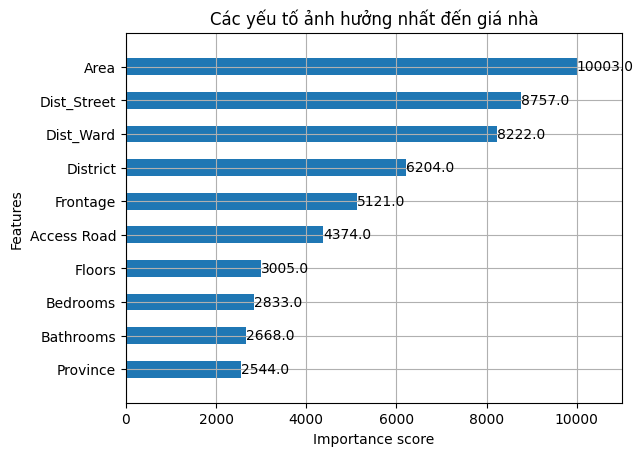

In [ ]:
plt.figure(figsize=(12, 8))
xgb.plot_importance(xg_reg, max_num_features=10, height=0.5) # Top 10 đặc trưng quan trọng nhất
plt.title("Các yếu tố ảnh hưởng nhất đến giá nhà")
plt.show()

### Hyperparameter tuning

In [ ]:
params = {
    'max_depth': [3, 5, 6, 8],           # Độ sâu cây
    'min_child_weight': [1, 3, 5, 7],    # Kiểm soát overfitting
    'gamma': [0, 0.1, 0.2, 0.4],         # Regularization
    'subsample': [0.6, 0.7, 0.8, 0.9],   # Tỷ lệ mẫu data
    'colsample_bytree': [0.6, 0.7, 0.8], # Tỷ lệ mẫu features
    'reg_alpha': [0, 0.01, 0.1, 1],      # L1 Regularization (giúp mô hình gọn hơn)
    'reg_lambda': [1, 1.5, 2]            # L2 Regularization
}

# Khởi tạo mô hình cơ sở
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=800,    # Cố định số cây vừa đủ để tuning nhanh
    learning_rate=0.05,  # Cố định tốc độ học trung bình
    random_state=42,
    n_jobs=1
)

xg_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=params,
    n_iter=50,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

print("Đang tìm kiếm tham số cấu trúc cây...")
xg_random.fit(X_train, y_train)

print("Tham số cấu trúc tốt nhất:", xg_random.best_params_)


# Lấy params tốt nhất, nhưng TĂNG số cây và GIẢM learning rate
final_params_xg = xg_random.best_params_


Đang tìm kiếm tham số cấu trúc cây...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Tham số cấu trúc tốt nhất: {'subsample': 0.9, 'reg_lambda': 1.5, 'reg_alpha': 0, 'min_child_weight': 1, 'max_depth': 8, 'gamma': 0.2, 'colsample_bytree': 0.7}


In [ ]:
final_model_xg = xgb.XGBRegressor(
    **final_params_xg,
    n_estimators=17000,   # Tăng mạnh số lượng cây
    learning_rate=0.01,  # Giảm learning rate để hội tụ chính xác hơn
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50  # Dừng nếu không cải thiện sau 50 vòng
)
# Tách tập Validation riêng để tránh Data Leakage
X_train_fit, X_val, y_train_fit, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)
eval_set = [(X_train_fit, y_train_fit), (X_val, y_val)]

print("Đang train model cuối cùng với Early Stopping...")
final_model_xg.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=100               # In kết quả sau mỗi 100 vòng
)

# Dự đoán
y_pred_best_xg = final_model_xg.predict(X_test)

Đang train model cuối cùng với Early Stopping...
[0]	validation_0-rmse:2.19280	validation_1-rmse:2.20313
[100]	validation_0-rmse:1.38986	validation_1-rmse:1.38074
[200]	validation_0-rmse:1.13181	validation_1-rmse:1.11526
[300]	validation_0-rmse:1.02943	validation_1-rmse:1.01176
[400]	validation_0-rmse:0.97441	validation_1-rmse:0.95682
[500]	validation_0-rmse:0.93680	validation_1-rmse:0.91903
[600]	validation_0-rmse:0.90943	validation_1-rmse:0.89202
[700]	validation_0-rmse:0.88669	validation_1-rmse:0.86909
[800]	validation_0-rmse:0.86612	validation_1-rmse:0.84872
[900]	validation_0-rmse:0.84737	validation_1-rmse:0.83033
[1000]	validation_0-rmse:0.82966	validation_1-rmse:0.81289
[1100]	validation_0-rmse:0.81336	validation_1-rmse:0.79696
[1200]	validation_0-rmse:0.79812	validation_1-rmse:0.78202
[1300]	validation_0-rmse:0.78382	validation_1-rmse:0.76806
[1400]	validation_0-rmse:0.77051	validation_1-rmse:0.75454
[1500]	validation_0-rmse:0.75700	validation_1-rmse:0.74140
[1600]	validation_0

In [ ]:
# Lưu lại
joblib.dump(
    final_model_xg,
    "/content/drive/MyDrive/models/final_model_xg.pkl"
)

['/content/drive/MyDrive/models/final_model_xg.pkl']

In [ ]:
# load model
path_xg = '/content/drive/MyDrive/models/final_model_xg.pkl'
loaded_model_xg = joblib.load(path_xg)

In [ ]:
# Đánh giá
y_pred_best_xg = loaded_model_xg.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_best_xg)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_best_xg)
r2_xgb = r2_score(y_test, y_pred_best_xg)

print("--- Kết quả Đánh giá sau khi tuning---")
print(f"RMSE: {rmse_xgb:,.2f}")
print(f"MAE: {mae_xgb:,.2f}")
print(f"R2 Score: {r2_xgb:.4f}")

--- Kết quả Đánh giá sau khi tuning---
RMSE: 1.26
MAE: 0.90
R2 Score: 0.6791


# Kết quả

In [ ]:
models = ['Ridge Regression', 'Random Forest', 'XGBoost']

rmse_values = [rmse_rr, rmse_rf, rmse_xgb]
mae_values  = [mae_rr, mae_rf, mae_xgb]
r2_values   = [r2_rr, r2_rf, r2_xgb]

## RMSE

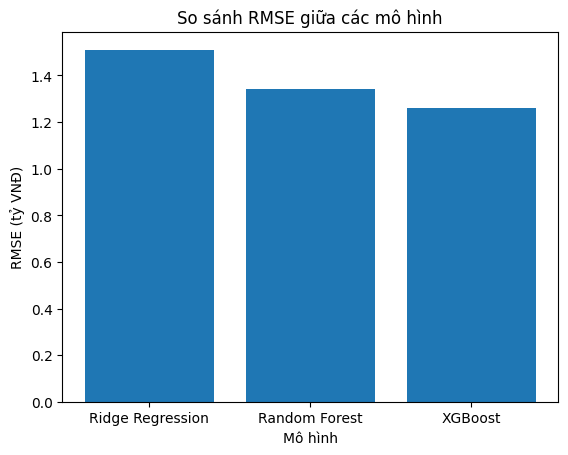

In [ ]:
plt.figure()
plt.bar(models, rmse_values)
plt.title('So sánh RMSE giữa các mô hình')
plt.ylabel('RMSE (tỷ VNĐ)')
plt.xlabel('Mô hình')
plt.show()

## MAE

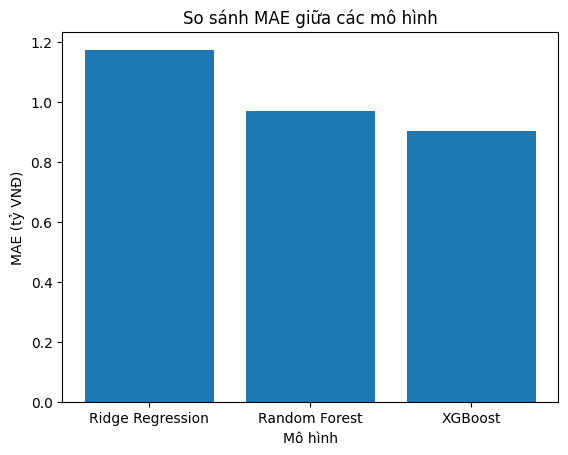

In [ ]:
plt.figure()
plt.bar(models, mae_values)
plt.title('So sánh MAE giữa các mô hình')
plt.ylabel('MAE (tỷ VNĐ)')
plt.xlabel('Mô hình')
plt.show()

## R2 score

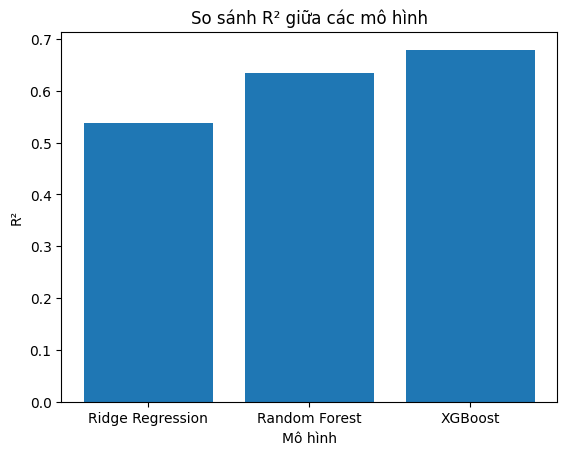

In [ ]:
plt.figure()
plt.bar(models, r2_values)
plt.title('So sánh R² giữa các mô hình')
plt.ylabel('R²')
plt.xlabel('Mô hình')
plt.show()


## Tổng hợp kết quả

In [ ]:
results_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R2': r2_values
})

results_df

,Model,RMSE,MAE,R2
0,Ridge Regression,1.510530,1.172675,0.537601
1,Random Forest,1.344046,0.968238,0.633911
2,XGBoost,1.258405,0.902214,0.679078
